In [28]:
!pip install matplotlib

# 测试

In [14]:
import numpy as np
import pandas as pd
import torch
a = np.ones((2,4))
b = np.array([[1,2,3,4],[5,6,7,8]])
b-a

array([[0., 1., 2., 3.],
       [4., 5., 6., 7.]])

In [4]:
b.reshape(2,-1)

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [16]:
c = torch.LongTensor([1,2,3,4,5])
c

tensor([1, 2, 3, 4, 5])

# 测试2

In [54]:
from torch.autograd import Variable
x = Variable(torch.Tensor([1]),requires_grad=True)
w = Variable(torch.Tensor([2]),requires_grad=True)
b = Variable(torch.Tensor([3]),requires_grad=True)
y=w*x+b
y.backward()
print(x.grad)
print(w.grad)
print(b.grad)

tensor([2.])
tensor([1.])
tensor([1.])


In [24]:
x = torch.randn(3)
x = Variable(x,requires_grad=True)
y = x*2;
print(y)
y.backward(torch.FloatTensor([1,1,1]))
print(x.grad)

tensor([-1.7709,  0.5968, -1.2802], grad_fn=<MulBackward0>)
tensor([2., 2., 2.])


In [25]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

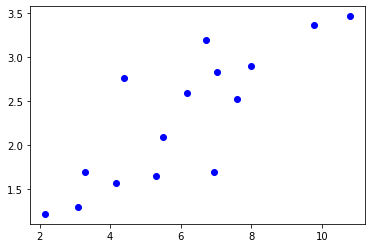

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_train,y_train,'bo')

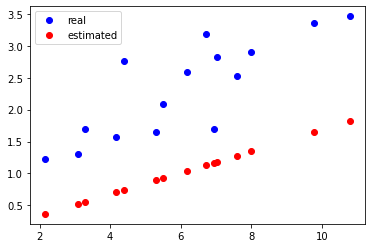

In [92]:
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
w = Variable(torch.randn(1), requires_grad=True) # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True) # 使用 0 进行初始化
x_train = Variable(x_train)
y_train = Variable(y_train)
def linear_model(x):
    return x*w+b
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [93]:
def getloss(y_,y):
    return torch.mean((y_-y_train)**2)
loss = getloss(y_,y_train)
print(loss)

tensor(1.9180, grad_fn=<MeanBackward0>)


In [94]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([-16.8442])
tensor([-2.6094])


## 参数更新

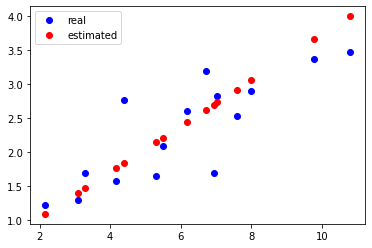

In [95]:
w.data = w.data - 0.01*w.grad.data
b.data = w.data - 0.01*b.grad.data
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [140]:
for e in range(10): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = getloss(y_, y_train)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.item()))

RuntimeError: The size of tensor a (15) must match the size of tensor b (3) at non-singleton dimension 0

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


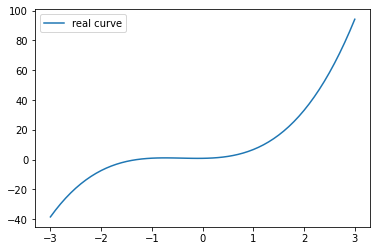

In [98]:
w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子

print(f_des)
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

In [100]:
x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1)
x_train = torch.from_numpy(x_train).float() # 转换成 float tensor
y_train = torch.from_numpy(y_sample).float().unsqueeze(1) # 转化成 float tensor 
w = Variable(torch.randn(3, 1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

# 将 x 和 y 转换成 Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

def multi_linear(x):
    return torch.mm(x, w) + b

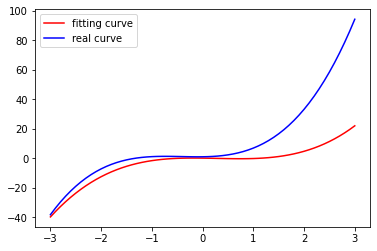

In [101]:
# 画出更新之前的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

In [102]:
loss = getloss(y_pred,y_train)
print(loss)

tensor(509.2321, grad_fn=<MeanBackward0>)


In [103]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ -47.6578],
        [-143.8642],
        [-309.8953]])
tensor([-26.5910])


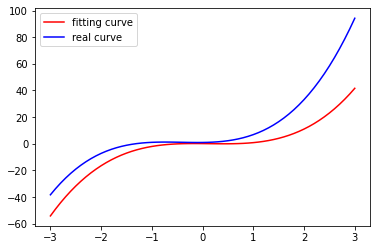

In [105]:
w.data = w.data - 0.001 * w.grad.data
b.data = b.data - 0.001 * b.grad.data
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

In [108]:
for e in range(100):
    y_pred = multi_linear(x_train)
    loss = getloss(y_pred, y_train)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    
    # 更新参数
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    if (e + 1) % 20 == 0:
        print('epoch {}, Loss: {:.5f}'.format(e+1, loss.item()))

epoch 20, Loss: 15.42155
epoch 40, Loss: 3.81130
epoch 60, Loss: 1.09366
epoch 80, Loss: 0.45169
epoch 100, Loss: 0.29443


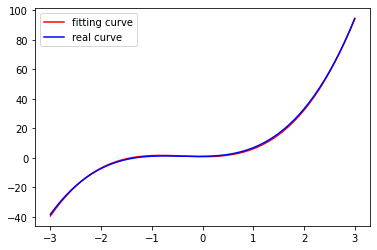

In [109]:
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

In [115]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [226]:
import torch.nn as nn
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1,1)
    def forward(self,x):
        out = self.linear(x)
        return out
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()

In [227]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=1e-3)

AttributeError: 'SGD' object has no attribute 'SGD'

In [138]:
epochs = 1000
for epoch in range(epochs):
    if torch.cuda.is_available():
        inputs = Variable(x_train).cuda()
        target = Variable(y_train).cuda()
    else:
        inputs = Variable(x_train)
        target = Variable(y_train)
    #forward
    out = model(inputs)
    loss = criterion(out,target)
    #backward
    optimizer.zero_grad()#归零梯度
    loss.backward()
    optimizer.step()#更新参数
    if(epoch+1)%20 == 0:
        print('Epoch[{}/{}],loss:{:.6f}'.format(epoch+1,epochs,loss.item()))

Epoch[20/1000],loss:0.170113
Epoch[40/1000],loss:0.170101
Epoch[60/1000],loss:0.170089
Epoch[80/1000],loss:0.170077
Epoch[100/1000],loss:0.170065
Epoch[120/1000],loss:0.170053
Epoch[140/1000],loss:0.170041
Epoch[160/1000],loss:0.170030
Epoch[180/1000],loss:0.170018
Epoch[200/1000],loss:0.170007
Epoch[220/1000],loss:0.169996
Epoch[240/1000],loss:0.169985
Epoch[260/1000],loss:0.169974
Epoch[280/1000],loss:0.169963
Epoch[300/1000],loss:0.169952
Epoch[320/1000],loss:0.169942
Epoch[340/1000],loss:0.169931
Epoch[360/1000],loss:0.169921
Epoch[380/1000],loss:0.169911
Epoch[400/1000],loss:0.169901
Epoch[420/1000],loss:0.169890
Epoch[440/1000],loss:0.169880
Epoch[460/1000],loss:0.169871
Epoch[480/1000],loss:0.169861
Epoch[500/1000],loss:0.169851
Epoch[520/1000],loss:0.169842
Epoch[540/1000],loss:0.169832
Epoch[560/1000],loss:0.169823
Epoch[580/1000],loss:0.169813
Epoch[600/1000],loss:0.169804
Epoch[620/1000],loss:0.169795
Epoch[640/1000],loss:0.169786
Epoch[660/1000],loss:0.169777
Epoch[680/1000

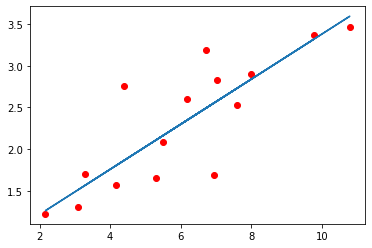

In [139]:
model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original Data')
plt.plot(x_train.numpy(),predict,label='Fitting Line')
plt.show()

In [151]:
def sigmoid(x):
    z = 1/(1+np.exp(-x))
    return z
def initailize_params(dims):
    w = np.zeros((dims,1))
    b = 0
    return w,b
def logisitic(X,y,W,b):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    a = sigmoid(np.dot(X,w) + b)
    cost = -1/num_train * np.sum(y*np.log(a)+(1-y)*np.log(1-a))
    dW = np.dot(X.T,(a-y))/num_train
    db = np.sum(a-y)/np_train
    cost = np.squeeze(cost)
    return a,cost,dW,db


In [153]:
def logistic_train(X, y, learning_rate, epochs):
    W,b = initialize_params(X.shape[1])
    cost_list = []
    for i in range(epochs):
        a,cost,dW,db = logistic(X,y,W,b)
        W = W -learning_rate * dW
        b = b -learning_rate * db
        # 记录损失
        if i % 100 == 0:
            cost_list.append(cost)
        # 打印训练过程中的损失
        if i % 100 == 0:
            print('epoch %d cost %f' % (i, cost))
    params = {'W':W,'b':b}
    grads = {'dW':dW,'db':'db'}
    return cost_list,params,grads

In [154]:
def predict(X,params):#进行分类
    y_prediction = sigmoid(np.dot(X,params['w'])+params['b'])
    for i in range(len(y_prediction)):
        if y_prediction[i]>0.5:
            y_prediction[i] = 1
        else:
            y_predicyion[i] = 0
    return y_prediction

In [160]:
import torch.nn.functional as F

In [161]:
w = Variable(torch.randn(2, 1), requires_grad=True) 
b = Variable(torch.zeros(1), requires_grad=True)

def logistic_regression(x):
    return F.sigmoid(torch.mm(x, w) + b)

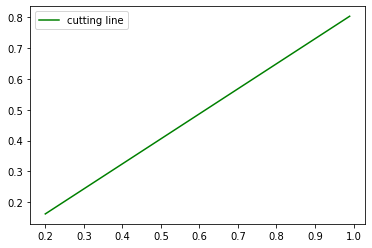

In [163]:
w0 = w[0].data[0]
w1 = w[1].data[0]
b0 = b.data[0]

plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0 * plot_x - b0) / w1

plt.plot(plot_x, plot_y, 'g', label='cutting line')
plt.legend(loc='best')

In [165]:
from torch import nn
w = nn.Parameter(torch.randn(2,1))
b = nn.Parameter(torch.zeros(1))
def logistic_regression(x):
    return F.sigmoid(torch.mm(x,w)+b)
optmizer = torch.optim.SGD([w,b],lr=1.)

In [167]:
def binary_loss(y_pred, y):
    logits = (y * y_pred.clamp(1e-12).log() + (1 - y) * (1 - y_pred).clamp(1e-12).log()).mean()
    return -logits

In [174]:
y =np.array([1,2,3,4,5,6,6]) 
c=y.reshape(-1,1)
c

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [6]])

In [175]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
def plot_decision_boundary(model, x, y):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [176]:
np.random.seed(1)
m = 400 # 样本数量
N = int(m/2) # 每一类的点的个数
D = 2 # 维度
x = np.zeros((m, D))
y = np.zeros((m, 1), dtype='uint8') # label 向量，0 表示红色，1 表示蓝色
a = 4

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

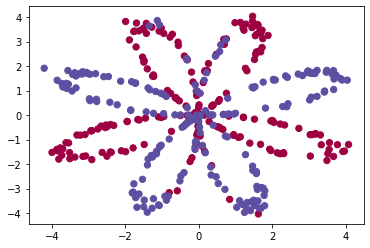

In [177]:
plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [243]:
seq_net = nn.Sequential(
    nn.Linear(2, 4), # PyTorch 中的线性层，wx + b
    nn.Tanh(),
    nn.Linear(4, 4),
    nn.Tanh(),
    nn.Linear(4, 1)
)

In [236]:
seq_net[0]

Linear(in_features=2, out_features=4, bias=True)

In [237]:
w0 = seq_net[0].weight
print(w0)

Parameter containing:
tensor([[ 0.6353, -0.6024],
        [ 0.6997,  0.3488],
        [-0.5623,  0.2939],
        [-0.3763, -0.2204]], requires_grad=True)


In [259]:
#取得模型参数并定义优化器，优化器第二个参数为学习率
param = seq_net.parameters()
optim = torch.optim.SGD(param,0.2)
#注意使用优化器需要新类型变量parameter

In [260]:
for e in range(5000):
    out = seq_net(Variable(x))
    loss = criterion(out, Variable(y.float()))
    #自带的函数将损失函数与损失计算放在一起，直接导出损失值即可
    #输入为预测输出与实际标签
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.item()))

epoch: 1000, loss: nan
epoch: 2000, loss: nan
epoch: 3000, loss: nan
epoch: 4000, loss: nan
epoch: 5000, loss: nan


In [231]:
def plot_seq(x):
    out = torch.sigmoid(seq_net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

Text(0.5, 1.0, 'sequential')

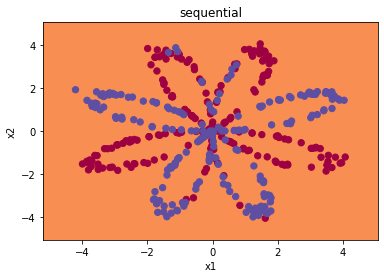

In [271]:
plot_decision_boundary(lambda x: plot_seq(x), x.numpy(), y.numpy())
plt.title('sequential')

In [251]:
seq_net

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): Tanh()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

### 注意这里的loss = criterion()语句中的输入变量需要转化为浮点型，但是先前的代码中不需要。
### 除此之外，__init__()为双下划线，需要注意。

In [270]:
class maqun(nn.Module):
    def __init__(self,num_input,num_hidden,num_output):
        super(maqun,self).__init__()
        self.layer1 = nn.Linear(num_input,num_hidden)
        self.layer2 = nn.Tanh()
        self.layer3 = nn.Linear(num_hidden,num_output)
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x
mq = maqun(2,4,1)
optim = torch.optim.SGD(mq.parameters(), 0.01)
for e in range(10000):
    out = mq(Variable(x))
    loss = criterion(out, Variable(y).float())
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.item()))

epoch: 1000, loss: 0.1582070291042328
epoch: 2000, loss: 0.1296747624874115
epoch: 3000, loss: 0.12440225481987
epoch: 4000, loss: 0.12216093391180038
epoch: 5000, loss: 0.12077596783638
epoch: 6000, loss: 0.11972639709711075
epoch: 7000, loss: 0.11884012818336487
epoch: 8000, loss: 0.1180526614189148
epoch: 9000, loss: 0.11733662337064743
epoch: 10000, loss: 0.11667820066213608
